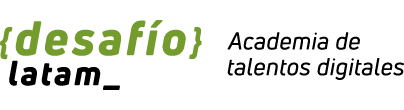

#<center><font color="green">Solución Desafío - Inferencia e hipótesis</font></center>

1. Considerando las variables earn, height y age, vamos a suponer que nuestro dataset fuera una población completa. (Prepara los datos adecuadamente).

a. Realiza pruebas con muestras de tamaño n = 25, en cada caso, con niveles de significancia diferentes pero inferiores a 0.1 pero mayores que 0.01, para confirmar o rechazar las siguientes hipótesis considerando las alternativas. Crea para ello una fórmula que reciba los parámetros adecuados y responda "con nivel de confianza del ...%, se acepta la hipótesis nula/alternativa".



In [86]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

# Cargar el conjunto de datos
data = pd.read_csv("earnings.csv")

def prueba_hipotesis_media(variable,mu,colas): #se define la función para las pruebas de hipótesis
  datos=data[variable]
  datos=datos.dropna()
  alpha=round(np.random.uniform(0.01, 0.1),2)
  confianza=100*(1-alpha)
  muestra = np.random.choice(datos, 25)
  t_stat, p_value = stats.ttest_1samp(muestra, mu, alternative=colas)

  # Comprobar si el valor p es menor que alfa para rechazar la hipótesis nula
  if p_value < alpha:
    if colas=='two-side':
      print(f"Con nivel de confianza de {confianza}% se acepta la hipótesis alternativa (la media es distinta {mu})")
    if colas=='greater':
      print(f"Con nivel de confianza de {confianza}% se acepta la hipótesis alternativa (la media es mayor que {mu})")
    if colas=='less':
      print(f"Con nivel de confianza de {confianza}% se acepta la hipótesis alternativa (la media es menor que {mu})")
  else:
    print(f"Con nivel de confianza de {confianza}% se acepta la hipótesis nula (la media es igual a {mu})")

  print(f"Valor t: {t_stat}")
  print(f"Valor p: {p_value}")
  print('\n')


casos={'earn':[[20000,'two-sided'],[35000,'two-sided'],[25000,'greater'],[32000,'less']],'height':[[55,'two-sided'],[68,'two-sided'],[63,'greater'],[70,'less']],'age':[[44,'two-sided'],[56,'two-sided'],[51,'greater'],[62,'less']]}


for key, values in casos.items():
    print(f"Variable: {key}")
    for value in values:
      prueba_hipotesis_media(key,value[0],value[1])

Variable: earn
Con nivel de confianza de 98.0% se acepta la hipótesis nula (la media es igual a 20000)
Valor t: -0.7749822450819327
Valor p: 0.44591908304712735


Con nivel de confianza de 92.0% se acepta la hipótesis nula (la media es igual a 35000)
Valor t: -0.8842735966298639
Valor p: 0.385321731339756


Con nivel de confianza de 96.0% se acepta la hipótesis nula (la media es igual a 25000)
Valor t: -1.8487798044240522
Valor p: 0.961576676018546


Con nivel de confianza de 95.0% se acepta la hipótesis alternativa (la media es menor que 32000)
Valor t: -4.260865627540985
Valor p: 0.00013602299569265245


Variable: height
Valor t: 15.084135739351055
Valor p: 9.611142826828571e-14


Con nivel de confianza de 92.0% se acepta la hipótesis nula (la media es igual a 68)
Valor t: -1.478498648720864
Valor p: 0.1522799366360225


Con nivel de confianza de 98.0% se acepta la hipótesis alternativa (la media es mayor que 63)
Valor t: 6.057004372968977
Valor p: 1.4810740075305011e-06


Con nivel 

   b. Calcula la media poblacional para cada variable. ¿Son correctos los resultados obtenidos por tus pruebas? Verifica.

In [ ]:
media_earn=np.mean(data['earn'])
media_height=np.mean(data['height'])
media_age=np.mean(data['age'])

print(media_earn)
print(media_height)
print(media_age)

21147.296255506608
66.56883259911895
42.934471365638764


2. Crea una función que estime la proporción de hombres en el dataset, considerando una muestra de 50 individuos, con niveles de significancia de 0,05 y 0,01. Escribe con palabras tus resultados ejecutar la función e interpreta. Compara con la proporción real.

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.proportion as proportion

hombres=data['male']
hombres=hombres.dropna()

tot_hombres=np.count_nonzero(hombres)
pobl=len(hombres)
prop_pobl=tot_hombres/pobl

muestra = np.random.choice(hombres, 50)


# Contar la cantidad de hombres en la muestra
num_hombres_muestra = np.count_nonzero(muestra)


# Proporción muestral de machos en la muestra
proporcion_muestral = num_hombres / 50

# Nivel de confianza (por ejemplo, 95%)
confianza=0.95

# Calcular el intervalo de confianza utilizando statsmodels
intervalo_confianza = sm.stats.proportion_confint(num_hombres, 50, 1-confianza)

# Imprimir el resultado
print(f"Intervalo de confianza del {confianza * 100}% para la proporción de machos en la población de pingüinos Adelia:")
print(f"({intervalo_confianza[0]}, {intervalo_confianza[1]})")

print(prop_pobl)



Intervalo de confianza del 95.0% para la proporción de machos en la población de pingüinos Adelia:
(0.20869704044738663, 0.4713029595526134)
0.3716960352422907


4. Considerando el dataset como una muestra, verifica si el género (male=1 significa "hombre”) influye sobre el sueldo “earn” de las personas. Explica y justifica tu procedimiento.

La hipótesis nula corresponde a que no hay influencia, es decir, que las medias no son estadísticamente significativas.

In [ ]:
# Filtrar los datos para obtener los psueldos de hombres y mujeres
sueldos_h = data[data["male"] == 1]["earn"]
sueldos_m = data[data["male"] == 0]["earn"]

# Eliminar filas con valores nulos en los datos de peso corporal
sueldos_h = sueldos_h.dropna()
sueldos_m = sueldos_m.dropna()

# Realizar una prueba de hipótesis (prueba t de muestras independientes)
t_stat, p_value = stats.ttest_ind(sueldos_h, sueldos_m, equal_var=False)

# Nivel de significancia (alfa)
alpha = 0.05

# Comprobar si el valor p es menor que alfa para rechazar la hipótesis nula
if p_value < alpha:
    print("Resultado: Se rechaza la hipótesis nula")
else:
    print("Resultado: No se rechaza la hipótesis nula")

# Imprimir el valor t y el valor p
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")



Resultado: Se rechaza la hipótesis nula
Valor t: 11.86459381795286
Valor p: 2.7373648004575493e-30
